In [2]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time

In [4]:
np.random.seed(seed=99)

Let's cook some data up for a multi-class classification problem...

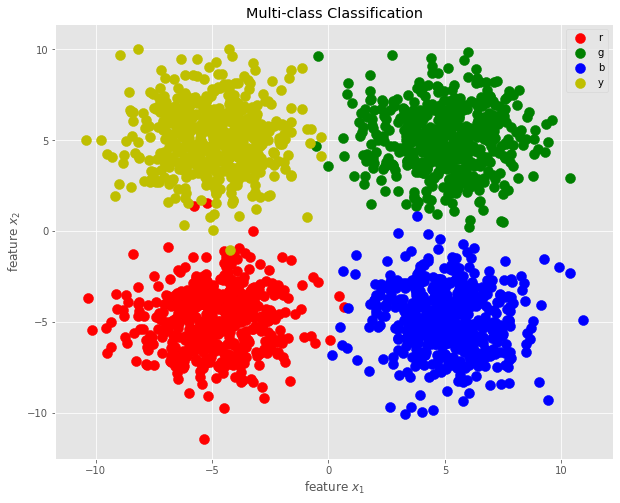

In [5]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]]

#create some points for the training set...
nexamples=2000
size=int(nexamples/4)

x1 = np.random.multivariate_normal(mean1,cov,[size])
x2 = np.random.multivariate_normal(mean2,cov,[size])
x3 = np.random.multivariate_normal(mean3,cov,[size])
x4 = np.random.multivariate_normal(mean4,cov,[size])

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((size,1)),2*np.ones((size,1)),3*np.ones((size,1)),4*np.ones((size,1))))

Y=Y[:,0]
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
size=int(ntexamples/4)
x1 = np.random.multivariate_normal(mean1,cov,[size])
x2 = np.random.multivariate_normal(mean2,cov,[size])
x3 = np.random.multivariate_normal(mean3,cov,[size])
x4 = np.random.multivariate_normal(mean4,cov,[size])

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((size,1)),2*np.ones((size,1)),3*np.ones((size,1)),4*np.ones((size,1))))

In [46]:
import randomForest as rf

In [47]:
rfc=rf.RandomForest(ntrees=10,weaklearner='Linear')

In [48]:
print (X.shape, Y.shape)

(2000, 2) (2000,)


In [49]:
rfc.train(X,Y)

In [50]:
len(rfc.trees)

10

In [51]:
# Training Confusion Matrix...
Yp=rfc.predict(X)
t.print_confusion_matrix(Yp,Y)

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
from nose.tools import assert_greater_equal
acc = np.sum(Y ==  np.array(Yp)) / float(Y.shape[0])

assert_greater_equal(acc, 0.78)
print (acc)

In [ ]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Y.shape, len(Ypt))
# t.print_confusion_matrix(Ypt,Yt)

In [ ]:
from nose.tools import assert_greater_equal
acc = np.sum(Yt ==  np.array(Ypt)) / float(Yt.shape[0]) 

assert_greater_equal(acc, 0.78)
print (acc)

### Lets Plot Per-Tree Decision Boundary

In [ ]:
ntrees=rfc.ntrees
nrows=int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

## Lets Run on Nonlinear Data, The Spherical Examples...

In [ ]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)

In [ ]:
print (X.shape, Y.shape)

In [ ]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [ ]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

In [ ]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

In [ ]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Y.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

In [ ]:
from nose.tools import assert_greater_equal
acc = np.sum(Y.flatten() ==  np.array(Yp)) / float(Y.shape[0]) 

assert_greater_equal(acc, 0.78)
print (acc)

In [ ]:
t.plot_points_range(rfc,X,Y)

## Find Best value of ntress   

In [1]:
import tools as t
X,Y=t.get_spherical_data(N=10000)
print (X.shape, Y.shape)
Xtest,Ytest=t.get_spherical_data(N=5000)

trees = np.arange(1, 21)

for tree in trees:
    rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=tree)
    rfc.train(X,Y[:,np.newaxis])

    Ypt=rfc.predict(Xtest)

    acc = np.sum(Ytest ==  np.array(Ypt)) / float(Ytest.shape[0]) 

    print ("Trees=", tree, " and Accuracy=", acc)

(30000, 2) (30000,)


NameError: name 'np' is not defined